# Exercícios Análise de Regressão

-----

## Introdução

-----

### 1 - Ajustando um Modelo de Regressão Linear Simples

Suponha que você tenha um conjunto de dados com duas variáveis: X (variável independente) e Y (variável dependente). Crie um conjunto de dados hipotético e ajuste um modelo de regressão linear simples para prever Y com base em X. Em seguida, calcule os coeficientes da regressão e o coeficiente de determinação (R²). Interprete os resultados.



In [67]:
# Importando as bibliotecas necessárias
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# Criando um conjunto de dados Fake
np.random.seed(11102023)
X = 2.5 * np.random.rand(100, 1)  # Variável independente X
Y = 2.7 * X + np.random.randn(100, 1)  # Variável dependente Y com ruído
X = [x[0] for x in X] # Converte em uma lista simples
Y = [y[0] for y in Y] # Converte em uma lista simples

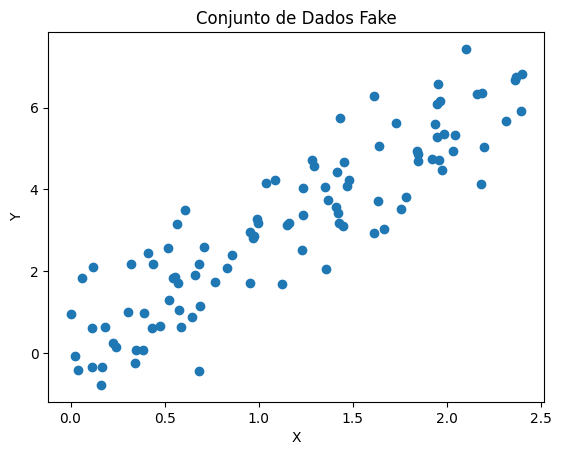

In [69]:
# Plotando o conjunto de dados
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Dados Fake')
plt.show()

#### Utilizando a definição

In [70]:

media_X = np.mean(X)
media_Y = np.mean(Y)

desvios_produto = np.sum((X - media_X) * (Y - media_Y))
desvios_quadrados_X = np.sum((X - media_X) ** 2)

beta = desvios_produto / desvios_quadrados_X

alfa = media_Y - beta * media_X

desvios_quadrados_Y = np.sum((Y - media_Y) ** 2)
r_2 = desvios_produto ** 2 / (desvios_quadrados_X * desvios_quadrados_Y)

print("Coeficiente Angular:", beta)
print("Coeficiente Linear:", alfa)
print("Coeficiente de Determinação (R²):", r_2)

Coeficiente Angular: 2.6408625959421492
Coeficiente Linear: 0.10713603503367564
Coeficiente de Determinação (R²): 0.8097313978857213


#### Utilizando biblioteca pronta

In [71]:
X_sm = sm.add_constant(X)

modelo = sm.OLS(Y, X_sm)

resultado = modelo.fit()

print(resultado.summary())

beta_sm = resultado.params[1]
alfa_sm = resultado.params[0]
r_2_sm = resultado.rsquared

print("Coeficiente Angular:", beta_sm)
print("Coeficiente Linear:", alfa_sm)
print("Coeficiente de Determinação (R²):", r_2_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     417.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           4.36e-37
Time:                        10:45:17   Log-Likelihood:                -130.24
No. Observations:                 100   AIC:                             264.5
Df Residuals:                      98   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1071      0.174      0.617      0.5

#### Plotando dados com a função gerada

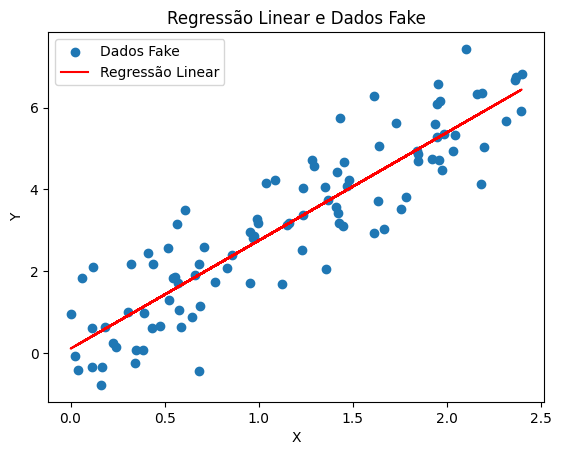

In [72]:
# Valores estimados da função gerada
Y_est = alfa + beta * np.array(X)

# Plotagem dos dados e da função gerada
plt.scatter(X, Y, label='Dados Fake')
plt.plot(X, Y_est, color='red', label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear e Dados Fake')
plt.show()

#### Interpretação dos Resultados

A interpretação dos resultados sugere que existe uma relação positiva entre a variável X e Y, com um aumento médio de 2,64 unidades Y para cada unidade X. O modelo de regressão linear parece adequado para os dados, explicando aproximadamente 80,97% da variabilidade dos dados.


É importante frisar que os resultados encontrados pelo cálculo através da definição e entregues pela lib statsmodel foram identicos!





_____





### 2 - Regressão Linear Múltipla

Agora, adicione uma segunda variável independente, Z, ao conjunto de dados do Exercício 1. Ajuste um modelo de regressão linear múltipla para prever Y com base em X e Z. Calcule os coeficientes da regressão e interprete o efeito de X e Z sobre Y.

In [73]:
Z = 4.7 * np.random.rand(100, 1)  # Variável independente Z
Z = [z[0] for z in Z] # Converte em uma lista simples

#### Utilizando a Definição

In [74]:
# Criar matriz XZ com colunas de X e Z
XZ = np.array([X, Z]).T
XZ = np.column_stack((np.ones(len(XZ)), XZ))

# # Criar vetor R
R = np.array(Y).reshape(-1, 1)
 
# Calcular os coeficientes usando a fórmula dos mínimos quadrados (X'X)^{-1}X'y
coeficientes = np.linalg.inv(XZ.T @ XZ) @ XZ.T @ R


In [75]:
print(f'Coeficientes encontrados: {coeficientes[0]}   {coeficientes[1]}   {coeficientes[2]}')

Coeficientes encontrados: [0.03929814]   [2.64418957]   [0.02624194]


#### Resíduos

In [76]:
# Estimativa de Y usando X + Z
Y_est = XZ @ coeficientes

# Desvios de Estimativa vs Real
np.array(Y) - np.array(Y_est).T[0]

array([-1.43157639e+00,  3.40629638e-02, -9.50149042e-01,  3.52257014e-01,
       -1.86550095e-01, -5.50539141e-01,  1.21247157e+00, -2.52830035e-01,
       -1.75388490e+00,  7.17462030e-01,  8.15834239e-01,  6.43795575e-02,
        8.69352694e-01, -4.72423025e-01, -1.53016309e-01, -6.02313014e-01,
        1.09700489e+00, -4.03551018e-01,  1.28085127e+00,  1.81186288e+00,
       -3.81721029e-01,  1.91232298e+00, -5.99454084e-01, -1.29301793e+00,
        2.23762516e-01, -1.67109878e+00, -1.33623702e+00, -6.92646274e-01,
       -1.55556086e-02,  5.78836341e-01,  1.65881252e+00, -9.20230115e-01,
        1.59209767e+00,  3.51541783e-01,  8.51544357e-01,  9.80768025e-01,
        2.85088764e-01, -1.95716931e-01,  2.63675249e-01,  3.34628679e-01,
       -3.81711451e-01,  1.82228535e+00, -8.00055045e-01,  1.17324338e+00,
        2.96298078e-02,  1.37499288e+00,  5.65811000e-01,  1.51685392e-02,
        4.44843260e-01, -7.13063647e-01,  5.28932408e-02,  2.57100532e-02,
       -3.63136181e-02,  

In [77]:
# componente de X na variancia de Y
var_X = (coeficientes[1] ** 2) * (np.var(X))
var_X

# componente de Z na variancia de Y
var_Z = (coeficientes[2] ** 2) * (np.var(Z))
var_Z

# componente de residuos na variancia de Y
residuo = np.array(Y) - np.array(Y_est).T[0]
var_residuos = np.var(residuo)

print(
    "E_var_Y: ",
    var_X + var_Z + var_residuos,
    ", var_Y: ",
    np.var(Y),
)

E_var_Y:  [4.17190023] , var_Y:  4.16339532912444


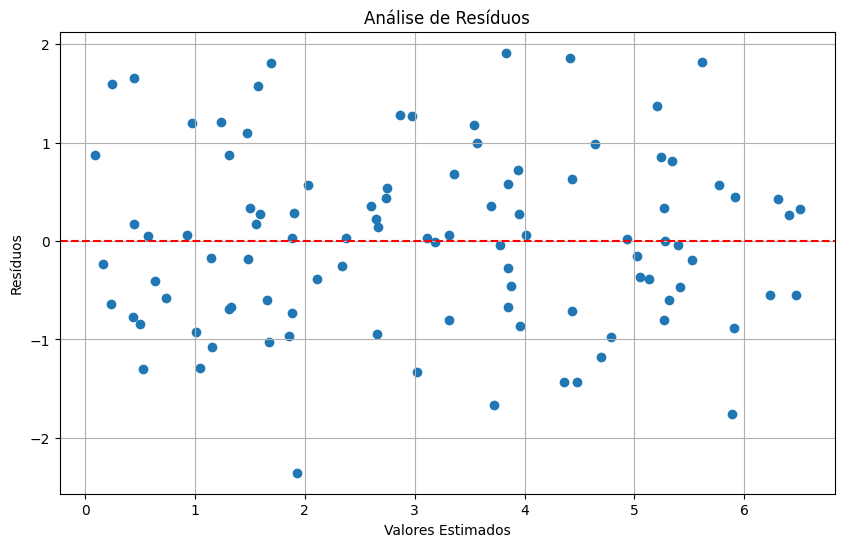

In [78]:
# Calcular os resíduos
residuos = R - Y_est

# Plotar gráfico de resíduos versus valores estimados
plt.figure(figsize=(10, 6))
plt.scatter(Y_est, residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Estimados")
plt.ylabel("Resíduos")
plt.title("Análise de Resíduos")
plt.grid()
plt.show()

#### Coeficiente de Determinação (R2)

In [79]:
SQE = sum((Y_est - np.mean(Y_est)) ** 2)
SQT = sum((Y - np.mean(Y)) ** 2)

R2 = SQE / SQT

print(f'R2 = {R2}')

R2 = [0.81003511]


#### Utilizando a lib pronta

In [80]:
# Criando um DataFrame com as variáveis exógenas (X, Z) e a variável endógena (Y)
df = pd.DataFrame(
    {"X": X, "Z": Z, "Y": Y}
)

# Adicionando uma coluna de 1s (termo linear) ao DataFrame
df = sm.add_constant(df)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X_df = df.drop(
    "Y", axis=1
)  # Excluindo a coluna "Y" para obter as variáveis independentes (features)
Y_df = df.Y  # Definindo a variável dependente (target ou alvo)

# Criando o modelo de regressão linear
modelo = sm.OLS(Y_df, X_df).fit()

# Exibindo um resumo da análise de regressão
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.04e-35
Time:                        10:45:17   Log-Likelihood:                -130.16
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      97   BIC:                             274.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0393      0.245      0.160      0.8

#### Variância dos coeficientes estimados

In [81]:
var_resid = modelo.resid.var()
dp_coeficientes = np.diag(var_resid * np.linalg.inv(X_df.T @ X_df)) ** 0.5

print(dp_coeficientes)

[0.24268717 0.1288283  0.06596022]


#### Limites inferior e superior do intervalo de confiança dos coeficientes

In [82]:
IC_inferior = coeficientes[0] - 1.96 * dp_coeficientes[0]
IC_superior = coeficientes[0] + 1.96 * dp_coeficientes[0]
print("IC_inferior_alfa:", IC_inferior, ", IC_superior_alfa:", IC_superior)

IC_inferior = coeficientes[1] - 1.96 * dp_coeficientes[1]
IC_superior = coeficientes[1] + 1.96 * dp_coeficientes[1]
print(
    "IC_inferior_X:", IC_inferior, ", IC_superior_X:", IC_superior
)

IC_inferior = coeficientes[2] - 1.96 * dp_coeficientes[2]
IC_superior = coeficientes[2] + 1.96 * dp_coeficientes[2]
print("IC_inferior_Z:", IC_inferior, ", IC_superior_Z:", IC_superior)

IC_inferior_alfa: [-0.43636871] , IC_superior_alfa: [0.51496499]
IC_inferior_X: [2.3916861] , IC_superior_X: [2.89669304]
IC_inferior_Z: [-0.10304008] , IC_superior_Z: [0.15552396]


#### Interpretação dos Resultados



É importante frisar que os resultados encontrados pelo cálculo através da definição e entregues pela lib statsmodel foram identicos!
Atraves das analises, tudo indica que a variável Z possui pouca influencia sobre o target, a variavel X tem uma  influencia bem maior, dependendo do modelo a variavel Z ate poderia ser desconsiderada. Ainda mais que Z valendo 0 é uma possibilidade dentro da sua distribuição de probabilidade. O mesmo efeito surge no intercepto.

Logo a hipotese que Z e intercepto sejam igual a zero não pode ser rejeitada

_____

### 3 - Comparação de Modelos de Regressão


No conjunto de dados do Exercício 2, ajuste um modelo de regressão linear simples (Y ~ X) e um modelo de regressão linear múltipla (Y ~ X + Z). Compare os modelos usando o coeficiente de determinação ajustado (R² ajustado) e determine qual modelo é mais apropriado.


##### **O cálculo dos R² já foram calculados anteriormente, então farei de maneira mais resumida dessa vez...**

#### Modelo Regressão Linear Simples (Y ~ X)

In [83]:
media_X = np.mean(X)
media_Y = np.mean(Y)

desvios_produto = np.sum((X - media_X) * (Y - media_Y))
desvios_quadrados_X = np.sum((X - media_X) ** 2)

desvios_quadrados_Y = np.sum((Y - media_Y) ** 2)
r_2 = desvios_produto ** 2 / (desvios_quadrados_X * desvios_quadrados_Y)

print("Coeficiente de Determinação (R²):", r_2)

Coeficiente de Determinação (R²): 0.8097313978857213


#### Modelo Regressão Linear Múltipla (Y ~ X + Z)

In [84]:
XZ = np.array([X, Z]).T
XZ = np.column_stack((np.ones(len(XZ)), XZ))


R = np.array(Y).reshape(-1, 1)

coeficientes = np.linalg.inv(XZ.T @ XZ) @ XZ.T @ R

Y_est = XZ @ coeficientes

SQE = sum((Y_est - np.mean(Y_est)) ** 2)
SQT = sum((Y - np.mean(Y)) ** 2)

R2 = SQE / SQT

print(f'Coeficiente de Determinação (R²): {R2}')

Coeficiente de Determinação (R²): [0.81003511]


In [85]:
R2 - r_2

array([0.00030371])

#### Interpretação dos Resultados

O coeficiente de determinação dos dois modelos estão muito próximos, entregando uma difereça de 0.00030371, quase irrelevante. Numericamente o mais adequado seria o de Regressão Linear Múltipla, porém na prática, o simples é tão bom quanto, talvez compense utiliza-lo dependendo da situação, por conta da sua menor complexidade.

____

#### 4 - Predições com um Modelo de Regressão

Suponha que você tenha ajustado um modelo de regressão linear simples para prever a nota dos alunos (Y) com base no número de horas de estudo (X). Use o modelo para fazer previsões: qual seria a nota prevista de um aluno que estudou 5 horas por dia? E se um aluno estudou 8 horas por dia?

##### **Esses cálculos do modelo já foram mostrados anteriormente, então farei de maneira mais resumida dessa vez...**

In [86]:
X_sm = sm.add_constant(X)
modelo = sm.OLS(Y, X_sm).fit()
previsao_df = pd.DataFrame({'const': 1, 'X': [5, 8]})
previsoes = modelo.predict(previsao_df)
print("Nota estimada para 5 horas:", previsoes[0])


Nota estimada para 5 horas: 13.311449014744413
